In [1]:
!pip install scipy
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas.plotting import scatter_matrix
import scipy
from sklearn.preprocessing import LabelEncoder


In [3]:
df =pd.read_csv('orderHeaderDonations.csv')
df

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.49079,153.06799
1,20052,190050,2000,2021-01-12,FoodieLand,-27.49079,153.06799
2,20053,190050,2000,2021-01-13,FoodieLand,-27.49079,153.06799
3,20054,190050,2000,2021-01-14,FoodieLand,-27.49079,153.06799
4,20055,190050,2000,2021-01-15,FoodieLand,-27.49079,153.06799
...,...,...,...,...,...,...,...
262,20135,190052,2000,2021-04-05,Grocertown,-27.54099,153.04839
263,20136,190052,2000,2021-04-06,Grocertown,-27.54099,153.04839
264,20137,190052,2000,2021-04-07,Grocertown,-27.54099,153.04839
265,20138,190052,2000,2021-04-08,Grocertown,-27.54099,153.04839


In [4]:
d = df.head(10)
d

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.49079,153.06799
1,20052,190050,2000,2021-01-12,FoodieLand,-27.49079,153.06799
2,20053,190050,2000,2021-01-13,FoodieLand,-27.49079,153.06799
3,20054,190050,2000,2021-01-14,FoodieLand,-27.49079,153.06799
4,20055,190050,2000,2021-01-15,FoodieLand,-27.49079,153.06799
5,20056,190050,2000,2021-01-16,FoodieLand,-27.49079,153.06799
6,20057,190050,2000,2021-01-17,FoodieLand,-27.49079,153.06799
7,20058,190050,2000,2021-01-18,FoodieLand,-27.49079,153.06799
8,20059,190050,2000,2021-01-19,FoodieLand,-27.49079,153.06799
9,20060,190050,2000,2021-01-20,FoodieLand,-27.49079,153.06799


In [5]:
df.tail()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
262,20135,190052,2000,2021-04-05,Grocertown,-27.54099,153.04839
263,20136,190052,2000,2021-04-06,Grocertown,-27.54099,153.04839
264,20137,190052,2000,2021-04-07,Grocertown,-27.54099,153.04839
265,20138,190052,2000,2021-04-08,Grocertown,-27.54099,153.04839
266,20139,190052,2000,2021-04-09,Grocertown,-27.54099,153.04839


In [6]:
df.shape

(267, 7)

In [7]:
df.values

array([[20051, 190050, 2000, ..., 'FoodieLand', -27.49079,
        153.06798999999998],
       [20052, 190050, 2000, ..., 'FoodieLand', -27.49079,
        153.06798999999998],
       [20053, 190050, 2000, ..., 'FoodieLand', -27.49079,
        153.06798999999998],
       ...,
       [20137, 190052, 2000, ..., 'Grocertown', -27.54099,
        153.04838999999998],
       [20138, 190052, 2000, ..., 'Grocertown', -27.54099,
        153.04838999999998],
       [20139, 190052, 2000, ..., 'Grocertown', -27.54099,
        153.04838999999998]], dtype=object)

In [8]:
df.columns

Index(['OrderId', 'PartnerId', 'OrderTotal', 'OrderDate', 'PartnerName',
       'PartnerGeoLat', 'PartnerGeoLon'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=267, step=1)

In [10]:
df.dtypes

OrderId            int64
PartnerId          int64
OrderTotal         int64
OrderDate         object
PartnerName       object
PartnerGeoLat    float64
PartnerGeoLon    float64
dtype: object

In [11]:
df.nunique()

OrderId          89
PartnerId         3
OrderTotal        1
OrderDate        89
PartnerName       3
PartnerGeoLat     3
PartnerGeoLon     3
dtype: int64

In [12]:
df.count()

OrderId          267
PartnerId        267
OrderTotal       267
OrderDate        267
PartnerName      267
PartnerGeoLat    267
PartnerGeoLon    267
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderId        267 non-null    int64  
 1   PartnerId      267 non-null    int64  
 2   OrderTotal     267 non-null    int64  
 3   OrderDate      267 non-null    object 
 4   PartnerName    267 non-null    object 
 5   PartnerGeoLat  267 non-null    float64
 6   PartnerGeoLon  267 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 14.7+ KB


In [14]:
df.value_counts()

OrderId  PartnerId  OrderTotal  OrderDate   PartnerName  PartnerGeoLat  PartnerGeoLon
20051    190050     2000        2021-01-11  FoodieLand   -27.49079      153.06799        1
20112    190050     2000        2021-03-13  FoodieLand   -27.49079      153.06799        1
20107    190051     2000        2021-03-08  LoMarket     -27.53899      153.07429        1
         190052     2000        2021-03-08  Grocertown   -27.54099      153.04839        1
20108    190050     2000        2021-03-09  FoodieLand   -27.49079      153.06799        1
                                                                                        ..
20082    190051     2000        2021-02-11  LoMarket     -27.53899      153.07429        1
         190052     2000        2021-02-11  Grocertown   -27.54099      153.04839        1
20083    190050     2000        2021-02-12  FoodieLand   -27.49079      153.06799        1
         190051     2000        2021-02-12  LoMarket     -27.53899      153.07429        1
2013

In [15]:
df.isnull().sum()

OrderId          0
PartnerId        0
OrderTotal       0
OrderDate        0
PartnerName      0
PartnerGeoLat    0
PartnerGeoLon    0
dtype: int64

<AxesSubplot:>

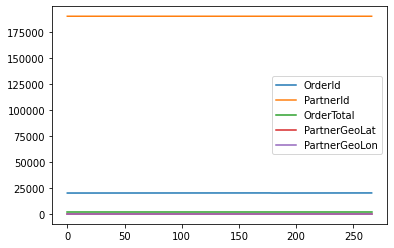

In [16]:
df.plot(kind = 'line')

<AxesSubplot:xlabel='OrderId', ylabel='OrderDate'>

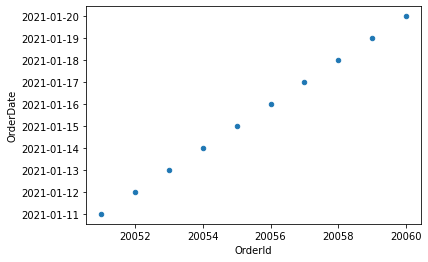

In [17]:
d.plot(kind = 'scatter',x = 'OrderId',y ='OrderDate')

<AxesSubplot:>

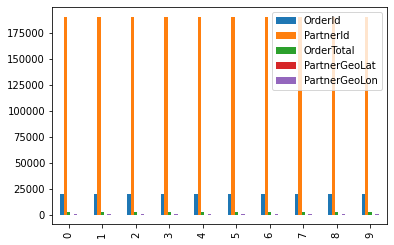

In [18]:
d.plot.bar(stacked = False)

<AxesSubplot:>

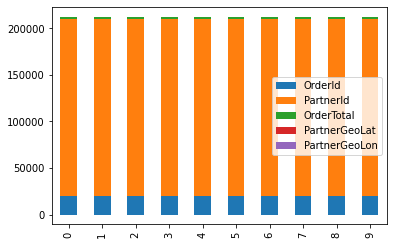

In [19]:
d.plot.bar(stacked = True)

<AxesSubplot:ylabel='Frequency'>

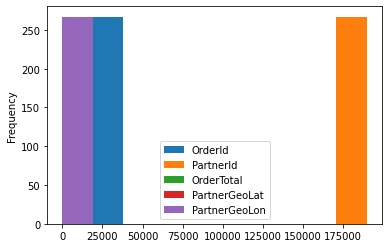

In [20]:
df.plot.hist()

<AxesSubplot:>

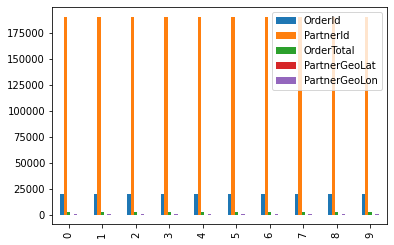

In [21]:
d.plot.bar()

<AxesSubplot:title={'center':'OrderId'}, xlabel='[PartnerId, PartnerName]'>

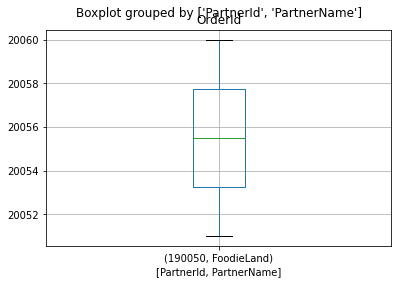

In [22]:
d.boxplot(column=["OrderId"],by = ['PartnerId','PartnerName'])

<AxesSubplot:>

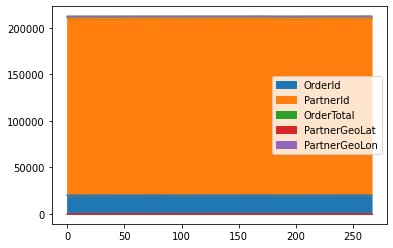

In [23]:
df.plot.area()

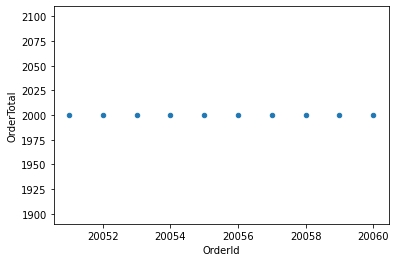

In [24]:
d.plot.scatter(x="OrderId", y="OrderTotal");


<AxesSubplot:xlabel='OrderId', ylabel='PartnerId'>

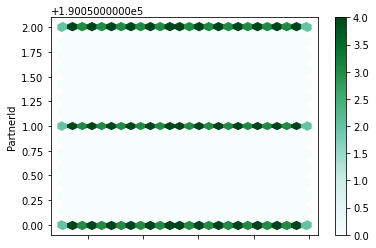

In [25]:
df.plot.hexbin(x='OrderId', y='PartnerId', gridsize=25)

/home/aaraheel/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 190050.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/aaraheel/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 2000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/aaraheel/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == -27.49079 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/aaraheel/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 153.06798999999998 results in singular transformations; automatically expanding.
  ax.set_

array([[<AxesSubplot:xlabel='OrderId', ylabel='OrderId'>,
        <AxesSubplot:xlabel='PartnerId', ylabel='OrderId'>,
        <AxesSubplot:xlabel='OrderTotal', ylabel='OrderId'>,
        <AxesSubplot:xlabel='PartnerGeoLat', ylabel='OrderId'>,
        <AxesSubplot:xlabel='PartnerGeoLon', ylabel='OrderId'>],
       [<AxesSubplot:xlabel='OrderId', ylabel='PartnerId'>,
        <AxesSubplot:xlabel='PartnerId', ylabel='PartnerId'>,
        <AxesSubplot:xlabel='OrderTotal', ylabel='PartnerId'>,
        <AxesSubplot:xlabel='PartnerGeoLat', ylabel='PartnerId'>,
        <AxesSubplot:xlabel='PartnerGeoLon', ylabel='PartnerId'>],
       [<AxesSubplot:xlabel='OrderId', ylabel='OrderTotal'>,
        <AxesSubplot:xlabel='PartnerId', ylabel='OrderTotal'>,
        <AxesSubplot:xlabel='OrderTotal', ylabel='OrderTotal'>,
        <AxesSubplot:xlabel='PartnerGeoLat', ylabel='OrderTotal'>,
        <AxesSubplot:xlabel='PartnerGeoLon', ylabel='OrderTotal'>],
       [<AxesSubplot:xlabel='OrderId', ylabel='Part

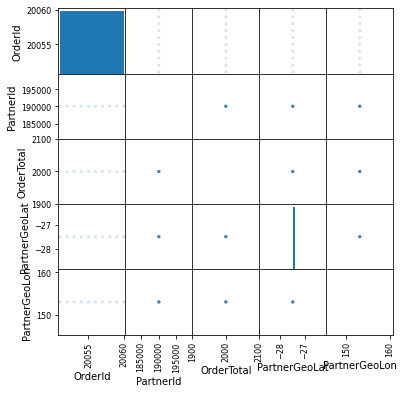

In [26]:
scatter_matrix(d, alpha=0.2, figsize=(6, 6))



In [27]:
df1 = pd.read_csv('orderHeaderRequests.csv')
df1

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon
0,50050,90050,200,2021-01-10,AGA North,Mark Burton,-27.54249,153.09159
1,50051,90050,200,2021-01-20,AGA North,Mark Burton,-27.54249,153.09159
2,50052,90050,200,2021-01-25,AGA North,Mark Burton,-27.54249,153.09159
3,50053,90050,200,2021-01-30,AGA North,Mark Burton,-27.54249,153.09159
4,50054,90050,200,2021-02-06,AGA North,Mark Burton,-27.54249,153.09159
...,...,...,...,...,...,...,...,...
387,50064,90069,200,2021-03-09,AGA South,Elizabeth Holt,-27.42669,153.01789
388,50065,90069,200,2021-03-13,AGA South,Elizabeth Holt,-27.42669,153.01789
389,50066,90069,200,2021-03-17,AGA South,Elizabeth Holt,-27.42669,153.01789
390,50067,90069,200,2021-03-19,AGA South,Elizabeth Holt,-27.42669,153.01789


In [28]:
d1 = df1.head()
d1

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon
0,50050,90050,200,2021-01-10,AGA North,Mark Burton,-27.54249,153.09159
1,50051,90050,200,2021-01-20,AGA North,Mark Burton,-27.54249,153.09159
2,50052,90050,200,2021-01-25,AGA North,Mark Burton,-27.54249,153.09159
3,50053,90050,200,2021-01-30,AGA North,Mark Burton,-27.54249,153.09159
4,50054,90050,200,2021-02-06,AGA North,Mark Burton,-27.54249,153.09159


In [29]:
df1.tail()

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon
387,50064,90069,200,2021-03-09,AGA South,Elizabeth Holt,-27.42669,153.01789
388,50065,90069,200,2021-03-13,AGA South,Elizabeth Holt,-27.42669,153.01789
389,50066,90069,200,2021-03-17,AGA South,Elizabeth Holt,-27.42669,153.01789
390,50067,90069,200,2021-03-19,AGA South,Elizabeth Holt,-27.42669,153.01789
391,50068,90069,200,2021-03-24,AGA South,Elizabeth Holt,-27.42669,153.01789


In [30]:
df1.index

RangeIndex(start=0, stop=392, step=1)

In [31]:
df1.values

array([[50050, 90050, 200, ..., 'Mark Burton', -27.54249, 153.09159],
       [50051, 90050, 200, ..., 'Mark Burton', -27.54249, 153.09159],
       [50052, 90050, 200, ..., 'Mark Burton', -27.54249, 153.09159],
       ...,
       [50066, 90069, 200, ..., 'Elizabeth Holt', -27.42669, 153.01789],
       [50067, 90069, 200, ..., 'Elizabeth Holt', -27.42669, 153.01789],
       [50068, 90069, 200, ..., 'Elizabeth Holt', -27.42669, 153.01789]],
      dtype=object)

In [32]:
df1.columns

Index(['OrderId', 'CustomerId', 'OrderTotal', 'OrderDate', 'Location',
       'CustomerName', 'CustomerGeoLat', 'CustomerGeoLon'],
      dtype='object')

In [33]:
df1.dtypes

OrderId             int64
CustomerId          int64
OrderTotal          int64
OrderDate          object
Location           object
CustomerName       object
CustomerGeoLat    float64
CustomerGeoLon    float64
dtype: object

In [34]:
df1.nunique()

OrderId           28
CustomerId        20
OrderTotal         1
OrderDate         80
Location           5
CustomerName      20
CustomerGeoLat    20
CustomerGeoLon    20
dtype: int64

In [35]:
df1.count()

OrderId           392
CustomerId        392
OrderTotal        392
OrderDate         392
Location          392
CustomerName      392
CustomerGeoLat    392
CustomerGeoLon    392
dtype: int64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderId         392 non-null    int64  
 1   CustomerId      392 non-null    int64  
 2   OrderTotal      392 non-null    int64  
 3   OrderDate       392 non-null    object 
 4   Location        392 non-null    object 
 5   CustomerName    392 non-null    object 
 6   CustomerGeoLat  392 non-null    float64
 7   CustomerGeoLon  392 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 24.6+ KB


In [37]:
df1.value_counts()

OrderId  CustomerId  OrderTotal  OrderDate   Location   CustomerName      CustomerGeoLat  CustomerGeoLon
50050    90050       200         2021-01-10  AGA North  Mark Burton       -27.54249       153.09159         1
50063    90060       200         2021-02-18  AGA HQ     Curtis White      -27.42379       153.09029         1
         90058       200         2021-02-18  AGA HQ     Pamela Beck       -27.54179       152.96789         1
         90057       200         2021-04-01  AGA South  Amanda Baker      -27.49959       152.98919         1
         90056       200         2021-03-16  AGA West   Amy Perry         -27.40929       152.96029         1
                                                                                                           ..
50056    90058       200         2021-01-29  AGA HQ     Pamela Beck       -27.54179       152.96789         1
         90057       200         2021-02-15  AGA South  Amanda Baker      -27.49959       152.98919         1
         90056 

In [38]:
df1.isnull().sum()

OrderId           0
CustomerId        0
OrderTotal        0
OrderDate         0
Location          0
CustomerName      0
CustomerGeoLat    0
CustomerGeoLon    0
dtype: int64

In [39]:
df1['Cust_Geo_Loc'] =df1['CustomerGeoLat'].astype(str) + "," + df1['CustomerGeoLon'].astype(str)

In [40]:
d2 = df1.head(100)
d2

,OrderId,CustomerId,OrderTotal,OrderDate,Location,CustomerName,CustomerGeoLat,CustomerGeoLon,Cust_Geo_Loc
0,50050,90050,200,2021-01-10,AGA North,Mark Burton,-27.54249,153.09159,"-27.54249,153.09159"
1,50051,90050,200,2021-01-20,AGA North,Mark Burton,-27.54249,153.09159,"-27.54249,153.09159"
2,50052,90050,200,2021-01-25,AGA North,Mark Burton,-27.54249,153.09159,"-27.54249,153.09159"
3,50053,90050,200,2021-01-30,AGA North,Mark Burton,-27.54249,153.09159,"-27.54249,153.09159"
4,50054,90050,200,2021-02-06,AGA North,Mark Burton,-27.54249,153.09159,"-27.54249,153.09159"
...,...,...,...,...,...,...,...,...,...
95,50054,90055,200,2021-01-23,AGA North,Elizabeth Baxter,-27.41409,153.08889,"-27.41409,153.08889"
96,50055,90055,200,2021-01-26,AGA North,Elizabeth Baxter,-27.41409,153.08889,"-27.41409,153.08889"
97,50056,90055,200,2021-01-29,AGA North,Elizabeth Baxter,-27.41409,153.08889,"-27.41409,153.08889"
98,50057,90055,200,2021-01-31,AGA North,Elizabeth Baxter,-27.41409,153.08889,"-27.41409,153.08889"


In [41]:
df1['CustomerName'].value_counts()

Curtis White         28
Timothy Jimenez      27
Brittany Crawford    27
Elizabeth Baxter     26
Amanda Rodriguez     25
Pamela Beck          25
Robert Lang          22
Joseph Smith         21
Justin Cunningham    21
Matthew Yates        19
Elizabeth Holt       19
Leah Smith           17
Amy Perry            17
Matthew Melendez     16
Steven Hicks         15
Larry Pierce         14
Amanda Baker         14
Mark Burton          14
Mark Stanley         13
Carl Rhodes          12
Name: CustomerName, dtype: int64

In [42]:
df1['Location'].value_counts()

AGA North    132
AGA West      77
AGA South     75
AGA HQ        75
AGA East      33
Name: Location, dtype: int64

<AxesSubplot:>

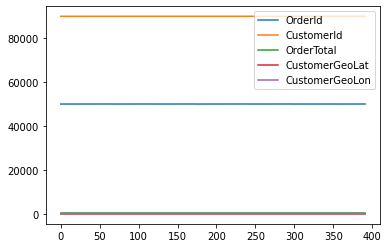

In [43]:
df1.plot(kind='line')

<AxesSubplot:xlabel='CustomerId', ylabel='CustomerName'>

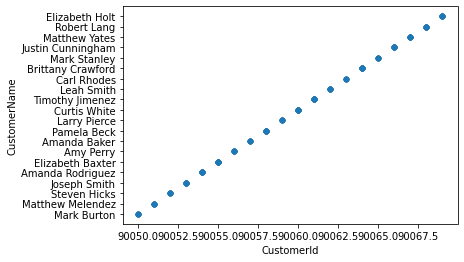

In [44]:
df1.plot(kind = 'scatter',x = 'CustomerId',y ='CustomerName')

<AxesSubplot:>

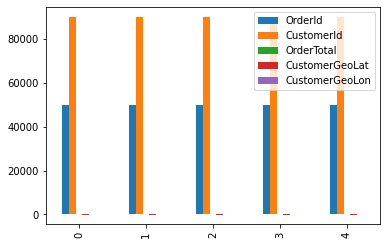

In [45]:
d1.plot.bar(stacked = False)

<AxesSubplot:>

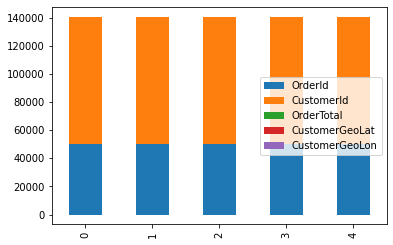

In [46]:
d1.plot.bar(stacked = True)

<AxesSubplot:ylabel='Frequency'>

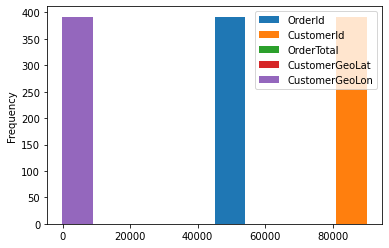

In [47]:
df1.plot.hist()

<AxesSubplot:>

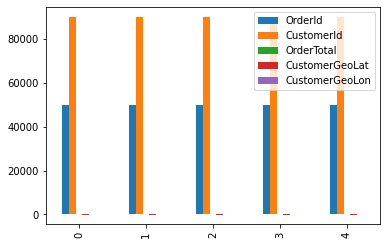

In [48]:
d1.plot.bar()

<AxesSubplot:title={'center':'OrderId'}, xlabel='[CustomerId, CustomerName]'>

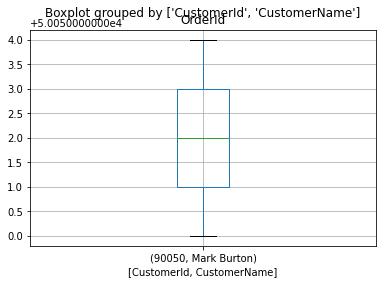

In [49]:
d1.boxplot(column=["OrderId"],by = ['CustomerId','CustomerName'],fontsize = 10)

<AxesSubplot:>

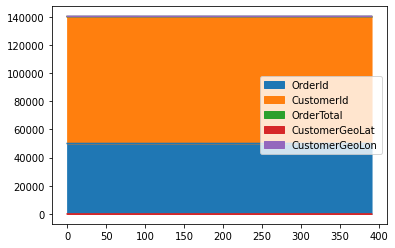

In [50]:
df1.plot.area()

<AxesSubplot:xlabel='CustomerName', ylabel='Cust_Geo_Loc'>

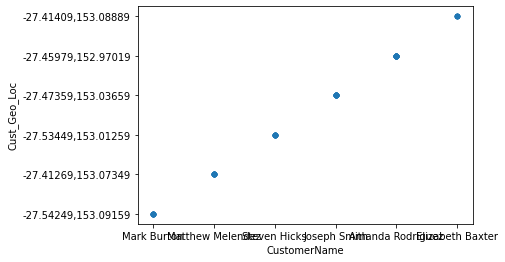

In [51]:
d2.plot.scatter(x="CustomerName", y='Cust_Geo_Loc',fontsize = 10)


<AxesSubplot:xlabel='OrderId', ylabel='CustomerId'>

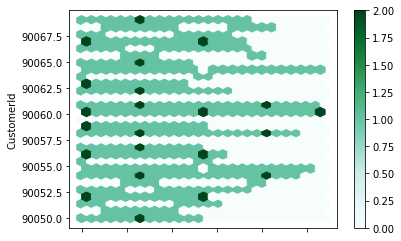

In [52]:
df1.plot.hexbin(x='OrderId', y='CustomerId', gridsize=25)

In [53]:

df_list = [df, df1]
data = pd.concat(df_list)


In [54]:
data.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon,CustomerId,Location,CustomerName,CustomerGeoLat,CustomerGeoLon,Cust_Geo_Loc
0,20051,190050.0,2000,2021-01-11,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,NaN,NaN,NaN
1,20052,190050.0,2000,2021-01-12,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,NaN,NaN,NaN
2,20053,190050.0,2000,2021-01-13,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,NaN,NaN,NaN
3,20054,190050.0,2000,2021-01-14,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,NaN,NaN,NaN
4,20055,190050.0,2000,2021-01-15,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
data.tail()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon,CustomerId,Location,CustomerName,CustomerGeoLat,CustomerGeoLon,Cust_Geo_Loc
387,50064,NaN,200,2021-03-09,NaN,NaN,NaN,90069.0,AGA South,Elizabeth Holt,-27.42669,153.01789,"-27.42669,153.01789"
388,50065,NaN,200,2021-03-13,NaN,NaN,NaN,90069.0,AGA South,Elizabeth Holt,-27.42669,153.01789,"-27.42669,153.01789"
389,50066,NaN,200,2021-03-17,NaN,NaN,NaN,90069.0,AGA South,Elizabeth Holt,-27.42669,153.01789,"-27.42669,153.01789"
390,50067,NaN,200,2021-03-19,NaN,NaN,NaN,90069.0,AGA South,Elizabeth Holt,-27.42669,153.01789,"-27.42669,153.01789"
391,50068,NaN,200,2021-03-24,NaN,NaN,NaN,90069.0,AGA South,Elizabeth Holt,-27.42669,153.01789,"-27.42669,153.01789"


In [56]:
data.shape

(659, 13)

In [57]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            382, 383, 384, 385, 386, 387, 388, 389, 390, 391],
           dtype='int64', length=659)

In [58]:
data.columns

Index(['OrderId', 'PartnerId', 'OrderTotal', 'OrderDate', 'PartnerName',
       'PartnerGeoLat', 'PartnerGeoLon', 'CustomerId', 'Location',
       'CustomerName', 'CustomerGeoLat', 'CustomerGeoLon', 'Cust_Geo_Loc'],
      dtype='object')

In [59]:
data.values

array([[20051, 190050.0, 2000, ..., nan, nan, nan],
       [20052, 190050.0, 2000, ..., nan, nan, nan],
       [20053, 190050.0, 2000, ..., nan, nan, nan],
       ...,
       [50066, nan, 200, ..., -27.42669, 153.01789,
        '-27.42669,153.01789'],
       [50067, nan, 200, ..., -27.42669, 153.01789,
        '-27.42669,153.01789'],
       [50068, nan, 200, ..., -27.42669, 153.01789,
        '-27.42669,153.01789']], dtype=object)

In [60]:
data.value_counts

<bound method DataFrame.value_counts of      OrderId  PartnerId  OrderTotal   OrderDate PartnerName  PartnerGeoLat  \
0      20051   190050.0        2000  2021-01-11  FoodieLand      -27.49079   
1      20052   190050.0        2000  2021-01-12  FoodieLand      -27.49079   
2      20053   190050.0        2000  2021-01-13  FoodieLand      -27.49079   
3      20054   190050.0        2000  2021-01-14  FoodieLand      -27.49079   
4      20055   190050.0        2000  2021-01-15  FoodieLand      -27.49079   
..       ...        ...         ...         ...         ...            ...   
387    50064        NaN         200  2021-03-09         NaN            NaN   
388    50065        NaN         200  2021-03-13         NaN            NaN   
389    50066        NaN         200  2021-03-17         NaN            NaN   
390    50067        NaN         200  2021-03-19         NaN            NaN   
391    50068        NaN         200  2021-03-24         NaN            NaN   

     PartnerGeoLon  Cus

In [61]:
data.dtypes

OrderId             int64
PartnerId         float64
OrderTotal          int64
OrderDate          object
PartnerName        object
PartnerGeoLat     float64
PartnerGeoLon     float64
CustomerId        float64
Location           object
CustomerName       object
CustomerGeoLat    float64
CustomerGeoLon    float64
Cust_Geo_Loc       object
dtype: object

In [62]:
data.set_index(['PartnerName','CustomerName'])

OrderId  PartnerId  OrderTotal   OrderDate  \
PartnerName CustomerName                                                 
FoodieLand  NaN               20051   190050.0        2000  2021-01-11   
            NaN               20052   190050.0        2000  2021-01-12   
            NaN               20053   190050.0        2000  2021-01-13   
            NaN               20054   190050.0        2000  2021-01-14   
            NaN               20055   190050.0        2000  2021-01-15   
...                             ...        ...         ...         ...   
NaN         Elizabeth Holt    50064        NaN         200  2021-03-09   
            Elizabeth Holt    50065        NaN         200  2021-03-13   
            Elizabeth Holt    50066        NaN         200  2021-03-17   
            Elizabeth Holt    50067        NaN         200  2021-03-19   
            Elizabeth Holt    50068        NaN         200  2021-03-24   

                            PartnerGeoLat  PartnerGeoLon  CustomerId  \
PartnerName CustomerName                                               
FoodieLand  NaN                 -27.49079      153.06799         NaN   
            NaN                 -27.49079      153.06799         NaN   
            NaN                 -27.49079      153.06799         NaN   
            NaN                 -27.49079      153.06799         NaN   
            NaN                 -27.49079      153.06799         NaN   
...                                   ...            ...         ...   
NaN         Elizabeth Holt            NaN            NaN     90069.0   
            Elizabeth Holt            NaN            NaN     90069.0   
            Elizabeth Holt            NaN            NaN     90069.0   
            Elizabeth Holt            NaN            NaN     90069.0   
            Elizabeth Holt            NaN            NaN     90069.0   

                             Location  CustomerGeoLat  CustomerGeoLon  \
PartnerName CustomerName                                                
FoodieLand  NaN                   NaN             NaN             NaN   
            NaN                   NaN             NaN             NaN   
            NaN                   NaN             NaN             NaN   
            NaN                   NaN             NaN             NaN   
            NaN                   NaN             NaN             NaN   
...                               ...             ...             ...   
NaN         Elizabeth Holt  AGA South       -27.42669       153.01789   
            Elizabeth Holt  AGA South       -27.42669       153.01789   
            Elizabeth Holt  AGA South       -27.42669       153.01789   
            Elizabeth Holt  AGA South       -27.42669       153.01789   
            Elizabeth Holt  AGA South       -27.42669       153.01789   

                                   Cust_Geo_Loc  
PartnerName CustomerName                         
FoodieLand  NaN                             NaN  
            NaN                             NaN  
            NaN                             NaN  
            NaN                             NaN  
            NaN                             NaN  
...                                         ...  
NaN         Elizabeth Holt  -27.42669,153.01789  
            Elizabeth Holt  -27.42669,153.01789  
            Elizabeth Holt  -27.42669,153.01789  
            Elizabeth Holt  -27.42669,153.01789  
            Elizabeth Holt  -27.42669,153.01789  

[659 rows x 11 columns]

In [63]:
data['PartnerName'].to_frame()

,PartnerName
0,FoodieLand
1,FoodieLand
2,FoodieLand
3,FoodieLand
4,FoodieLand
...,...
387,NaN
388,NaN
389,NaN
390,NaN


<AxesSubplot:ylabel='Density'>

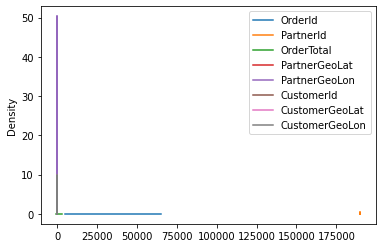

In [64]:
data.plot.kde()

<AxesSubplot:>

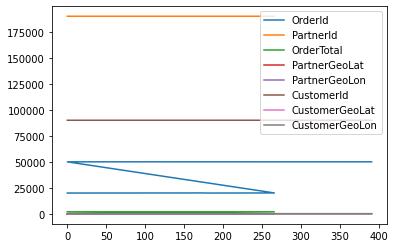

In [65]:
data.plot.line()

<AxesSubplot:ylabel='Frequency'>

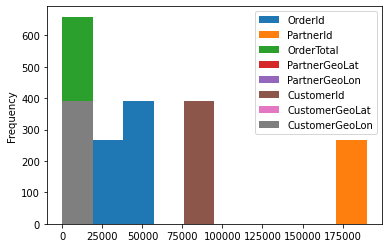

In [66]:
data.plot.hist()

<AxesSubplot:xlabel='PartnerId', ylabel='OrderId'>

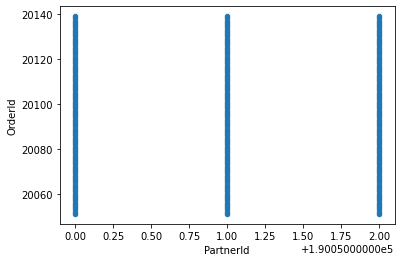

In [67]:
data.plot.scatter(x ='PartnerId',y ='OrderId')

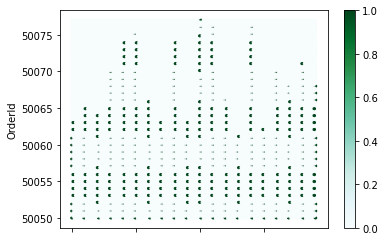

In [68]:
data.plot.hexbin(x="CustomerId", y="OrderId");


<AxesSubplot:>

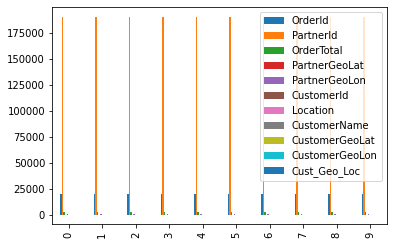

In [69]:
dt =data.head(10)
dt.plot.bar()

<AxesSubplot:>

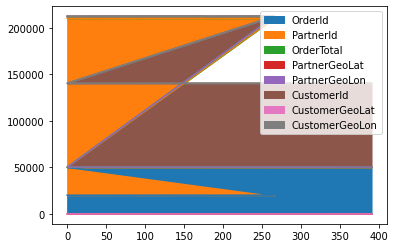

In [70]:
data.plot.area()

In [71]:
dummy = pd.get_dummies(data[['PartnerName','Location','CustomerName']])
dummy.head()


,PartnerName_FoodieLand,PartnerName_Grocertown,PartnerName_LoMarket,Location_AGA East,Location_AGA HQ,Location_AGA North,Location_AGA South,Location_AGA West,CustomerName_Amanda Baker,CustomerName_Amanda Rodriguez,...,CustomerName_Larry Pierce,CustomerName_Leah Smith,CustomerName_Mark Burton,CustomerName_Mark Stanley,CustomerName_Matthew Melendez,CustomerName_Matthew Yates,CustomerName_Pamela Beck,CustomerName_Robert Lang,CustomerName_Steven Hicks,CustomerName_Timothy Jimenez
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data1 = pd.concat((data,dummy),axis = 1)
data1.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon,CustomerId,Location,CustomerName,...,CustomerName_Larry Pierce,CustomerName_Leah Smith,CustomerName_Mark Burton,CustomerName_Mark Stanley,CustomerName_Matthew Melendez,CustomerName_Matthew Yates,CustomerName_Pamela Beck,CustomerName_Robert Lang,CustomerName_Steven Hicks,CustomerName_Timothy Jimenez
0,20051,190050.0,2000,2021-01-11,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,20052,190050.0,2000,2021-01-12,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,20053,190050.0,2000,2021-01-13,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,20054,190050.0,2000,2021-01-14,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,20055,190050.0,2000,2021-01-15,FoodieLand,-27.49079,153.06799,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data1 = data1.drop(['PartnerName','Location','Cust_Geo_Loc'],axis = 1)
data1.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerGeoLat,PartnerGeoLon,CustomerId,CustomerName,CustomerGeoLat,CustomerGeoLon,...,CustomerName_Larry Pierce,CustomerName_Leah Smith,CustomerName_Mark Burton,CustomerName_Mark Stanley,CustomerName_Matthew Melendez,CustomerName_Matthew Yates,CustomerName_Pamela Beck,CustomerName_Robert Lang,CustomerName_Steven Hicks,CustomerName_Timothy Jimenez
0,20051,190050.0,2000,2021-01-11,-27.49079,153.06799,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,20052,190050.0,2000,2021-01-12,-27.49079,153.06799,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,20053,190050.0,2000,2021-01-13,-27.49079,153.06799,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,20054,190050.0,2000,2021-01-14,-27.49079,153.06799,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,20055,190050.0,2000,2021-01-15,-27.49079,153.06799,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data1.isnull().sum()

OrderId                             0
PartnerId                         392
OrderTotal                          0
OrderDate                           0
PartnerGeoLat                     392
PartnerGeoLon                     392
CustomerId                        267
CustomerName                      267
CustomerGeoLat                    267
CustomerGeoLon                    267
PartnerName_FoodieLand              0
PartnerName_Grocertown              0
PartnerName_LoMarket                0
Location_AGA East                   0
Location_AGA HQ                     0
Location_AGA North                  0
Location_AGA South                  0
Location_AGA West                   0
CustomerName_Amanda Baker           0
CustomerName_Amanda Rodriguez       0
CustomerName_Amy Perry              0
CustomerName_Brittany Crawford      0
CustomerName_Carl Rhodes            0
CustomerName_Curtis White           0
CustomerName_Elizabeth Baxter       0
CustomerName_Elizabeth Holt         0
CustomerName

In [75]:
 data1.fillna(data.mean(),inplace = True)

/tmp/ipykernel_29863/3597753798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.fillna(data.mean(),inplace = True)


In [76]:
data1.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerGeoLat,PartnerGeoLon,CustomerId,CustomerName,CustomerGeoLat,CustomerGeoLon,...,CustomerName_Larry Pierce,CustomerName_Leah Smith,CustomerName_Mark Burton,CustomerName_Mark Stanley,CustomerName_Matthew Melendez,CustomerName_Matthew Yates,CustomerName_Pamela Beck,CustomerName_Robert Lang,CustomerName_Steven Hicks,CustomerName_Timothy Jimenez
0,20051,190050.0,2000,2021-01-11,-27.49079,153.06799,90059.670918,NaN,-27.472798,153.040742,...,0,0,0,0,0,0,0,0,0,0
1,20052,190050.0,2000,2021-01-12,-27.49079,153.06799,90059.670918,NaN,-27.472798,153.040742,...,0,0,0,0,0,0,0,0,0,0
2,20053,190050.0,2000,2021-01-13,-27.49079,153.06799,90059.670918,NaN,-27.472798,153.040742,...,0,0,0,0,0,0,0,0,0,0
3,20054,190050.0,2000,2021-01-14,-27.49079,153.06799,90059.670918,NaN,-27.472798,153.040742,...,0,0,0,0,0,0,0,0,0,0
4,20055,190050.0,2000,2021-01-15,-27.49079,153.06799,90059.670918,NaN,-27.472798,153.040742,...,0,0,0,0,0,0,0,0,0,0


In [77]:
data1.isnull().sum()

OrderId                             0
PartnerId                           0
OrderTotal                          0
OrderDate                           0
PartnerGeoLat                       0
PartnerGeoLon                       0
CustomerId                          0
CustomerName                      267
CustomerGeoLat                      0
CustomerGeoLon                      0
PartnerName_FoodieLand              0
PartnerName_Grocertown              0
PartnerName_LoMarket                0
Location_AGA East                   0
Location_AGA HQ                     0
Location_AGA North                  0
Location_AGA South                  0
Location_AGA West                   0
CustomerName_Amanda Baker           0
CustomerName_Amanda Rodriguez       0
CustomerName_Amy Perry              0
CustomerName_Brittany Crawford      0
CustomerName_Carl Rhodes            0
CustomerName_Curtis White           0
CustomerName_Elizabeth Baxter       0
CustomerName_Elizabeth Holt         0
CustomerName

In [78]:
data1.corr()

,OrderId,PartnerId,OrderTotal,PartnerGeoLat,PartnerGeoLon,CustomerId,CustomerGeoLat,CustomerGeoLon,PartnerName_FoodieLand,PartnerName_Grocertown,...,CustomerName_Larry Pierce,CustomerName_Leah Smith,CustomerName_Mark Burton,CustomerName_Mark Stanley,CustomerName_Matthew Melendez,CustomerName_Matthew Yates,CustomerName_Pamela Beck,CustomerName_Robert Lang,CustomerName_Steven Hicks,CustomerName_Timothy Jimenez
OrderId,1.000000e+00,-2.282371e-15,-9.999993e-01,-1.319629e-16,-3.023634e-12,1.225832e-05,5.738291e-05,1.507377e-05,-4.787896e-01,-4.787896e-01,...,1.215548e-01,1.342760e-01,1.215548e-01,1.170376e-01,1.301602e-01,1.421884e-01,1.639117e-01,1.533813e-01,1.259240e-01,1.706254e-01
PartnerId,-2.282371e-15,1.000000e+00,0.000000e+00,-8.830805e-01,-7.255412e-01,0.000000e+00,0.000000e+00,0.000000e+00,-7.603093e-01,7.603093e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
OrderTotal,-9.999993e-01,0.000000e+00,1.000000e+00,0.000000e+00,3.022617e-12,1.939644e-12,1.160191e-13,6.245736e-13,4.787899e-01,4.787899e-01,...,-1.215897e-01,-1.342980e-01,-1.215897e-01,-1.170760e-01,-1.301868e-01,-1.421999e-01,-1.638845e-01,-1.533749e-01,-1.259550e-01,-1.705831e-01
PartnerGeoLat,-1.319629e-16,-8.830805e-01,0.000000e+00,1.000000e+00,3.178030e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.773860e-01,-4.654426e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
PartnerGeoLon,-3.023634e-12,-7.255412e-01,3.022617e-12,3.178030e-01,1.000000e+00,-7.908299e-13,7.840239e-14,-1.007344e-13,2.495495e-01,-8.537219e-01,...,-3.644768e-13,-4.990552e-13,-7.249639e-14,-4.920781e-13,-1.116501e-13,-6.414243e-13,-4.553171e-13,-7.167544e-13,-1.403193e-13,-5.974716e-13
CustomerId,1.225832e-05,0.000000e+00,1.939644e-12,0.000000e+00,-7.908299e-13,1.000000e+00,-1.395266e-01,1.393213e-01,9.185211e-13,9.185211e-13,...,-2.288072e-02,8.773188e-02,-3.298129e-01,1.749942e-01,-3.166178e-01,2.923157e-01,-7.680622e-02,3.583064e-01,-2.709978e-01,6.359029e-02
CustomerGeoLat,5.738291e-05,0.000000e+00,1.160191e-13,0.000000e+00,7.840239e-14,-1.395266e-01,1.000000e+00,1.334668e-01,5.513700e-14,5.513700e-14,...,-7.821389e-02,6.710829e-02,-2.712953e-01,-2.203682e-01,2.505305e-01,-3.027132e-01,-3.619922e-01,-2.808356e-01,-2.487750e-01,2.567254e-01
CustomerGeoLon,1.507377e-05,0.000000e+00,6.245736e-13,0.000000e+00,-1.007344e-13,1.393213e-01,1.334668e-01,1.000000e+00,2.998856e-13,2.998856e-13,...,1.163354e-01,-1.559312e-01,2.139540e-01,-1.537617e-01,1.475376e-01,2.600625e-01,-4.131675e-01,4.908627e-02,-1.227070e-01,2.476266e-01
PartnerName_FoodieLand,-4.787896e-01,-7.603093e-01,4.787899e-01,8.773860e-01,2.495495e-01,9.185211e-13,5.513700e-14,2.998856e-13,1.000000e+00,-1.561404e-01,...,-5.821592e-02,-6.430053e-02,-5.821592e-02,-5.605482e-02,-6.233215e-02,-6.808389e-02,-7.846626e-02,-7.343434e-02,-6.030597e-02,-8.167345e-02
PartnerName_Grocertown,-4.787896e-01,7.603093e-01,4.787899e-01,-4.654426e-01,-8.537219e-01,9.185211e-13,5.513700e-14,2.998856e-13,-1.561404e-01,1.000000e+00,...,-5.821592e-02,-6.430053e-02,-5.821592e-02,-5.605482e-02,-6.233215e-02,-6.808389e-02,-7.846626e-02,-7.343434e-02,-6.030597e-02,-8.167345e-02


In [79]:
from sklearn import linear_model

In [106]:
X =data1[['OrderId']]
y =data1[['OrderTotal']]

In [130]:
X.values[Ellipsis, None]

array([[[20051]],

       [[20052]],

       [[20053]],

       [[20054]],

       [[20055]],

       [[20056]],

       [[20057]],

       [[20058]],

       [[20059]],

       [[20060]],

       [[20061]],

       [[20062]],

       [[20063]],

       [[20064]],

       [[20065]],

       [[20066]],

       [[20067]],

       [[20068]],

       [[20069]],

       [[20070]],

       [[20071]],

       [[20072]],

       [[20073]],

       [[20074]],

       [[20075]],

       [[20076]],

       [[20077]],

       [[20078]],

       [[20079]],

       [[20080]],

       [[20081]],

       [[20082]],

       [[20083]],

       [[20084]],

       [[20085]],

       [[20086]],

       [[20087]],

       [[20088]],

       [[20089]],

       [[20090]],

       [[20091]],

       [[20092]],

       [[20093]],

       [[20094]],

       [[20095]],

       [[20096]],

       [[20097]],

       [[20098]],

       [[20099]],

       [[20100]],

       [[20101]],

       [[20102]],

       [[201

In [131]:
y.values[Ellipsis, None]

array([[[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2000]],

       [[2

In [132]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)


In [133]:
model.coef_

array([[-0.06007004]])

In [134]:
model.intercept_

array([3207.10601696])

In [135]:
model.score(X,y)

0.9999986398563846